In [4]:
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import TensorBoard
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import datetime, os
import random

import os
from tqdm import tqdm
import cv2
import seaborn as sn
import pandas as pd
import random as rn
from scipy import stats

In [5]:
labels = ['Human', 'Blank','Elephant_African', 'Hog_Red_River','Buffalo_African','Leopard_African','Monkey','Duiker_Blue','Duiker_Red','Porcupine_Brush_Tailed','Rodent','Squirrel','Rat_Giant','Guineafowl_Crested','Duiker_Yellow_Backed','Guineafowl_Black','Mongoose','Rail_Nkulengu','Mammal_Other','Chimpanzee','Bird','Genet','Gorilla','Pangolin','Mongoose_Black_Footed','Mandrillus','Civet_African_Palm','Chevrotain_Water','Cat_Golden']

In [6]:
labels = pd.read_csv("C:/Users/Siebren/Data_science/Data/Data_Gabon/train_data.csv", header=None)

In [7]:
labels[1] = labels[1].map(lambda x: x.lstrip('../gabon-dataset/data_training_rescaled_extra/'))

In [8]:
labels

,0,1
0,Rat_Giant,1305658.jpg
1,Squirrel,1274561.jpg
2,Duiker_Red,1243945.jpg
3,Rodent,1642759.jpg
4,Human,1563059.jpg
...,...,...
243623,Blank,0037987.jpg
243624,Human,0706815.jpg
243625,Duiker_Yellow_Backed,1449133.jpg
243626,Duiker_Red,1634298.jpg


In [9]:
# count = 0
# for idx, item in labels.iterrows():
#     if item[1] == labels2["uniqueName"][idx]:
#         count += 1
# print(count)

In [7]:
class myanmarImg(): 
    training_data = []
    # import labels
    labels = pd.read_csv("C:/Users/Siebren/Data_science/Data/Data_Gabon/train_data.csv", header=None)
    labels[1] = labels[1].map(lambda x: x.lstrip('../gabon-dataset/data_training_rescaled_extra/'))
#     labels = labels[labels["is_valid"] == False]
#     labels = labels.sample(frac=0.2).reset_index(drop=True)
    # create list of all labels
#     label_list = []
#     for label in labels['species'].unique():
#         label_list.append(label)
        
    label_list = ['Rat_Giant', 'Squirrel', 'Duiker_Red', 'Rodent', 'Human',
       'Guineafowl_Black', 'Monkey', 'Duiker_Blue',
       'Duiker_Yellow_Backed', 'Elephant_African', 'Rail_Nkulengu',
       'Bird', 'Blank', 'Mandrillus', 'Chevrotain_Water',
       'Porcupine_Brush_Tailed', 'Leopard_African', 'Mongoose',
       'Hog_Red_River', 'Chimpanzee', 'Guineafowl_Crested',
       'Buffalo_African', 'Genet', 'Mongoose_Black_Footed',
       'Civet_African_Palm', 'Pangolin', 'Gorilla', 'Cat_Golden']
    
#     labels = labels[labels["is_valid"] == True]
    
    picture_list = []
    for i in labels.itertuples():
        picture_list.append(i[2])
    
    print(picture_list)
    IMG_SIZE = 100
    LINK = "C:/Users/Siebren/Data_science/Data/Data_gabon/data_training_rescaled_extra"
    training_data = []
    count = {}

    # add all labels
    for label in label_list:
        count[label] = 0

    def make_training_data(self):
        threshold = 0
        for f in tqdm(self.picture_list):
#             if threshold != 5000:
                try:
                    path = os.path.join(self.LINK, f)

                    img = cv2.imread(path, cv2.IMREAD_COLOR)
                    img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))

                    label_index = self.label_list.index(self.labels[0][self.labels[1] == f].iloc[0])
#                     label = self.labels['species'][self.labels["uniqueName"] == f].iloc[0]
                    
#                     zero_list = [0] * 28
#                     zero_list[label_index] = 1
                    self.training_data.append([np.array(img), label_index, f])
#                     self.training_data.append(np.sum(np.array(img))/ (244 * 244))
                    
                    # count the images
                    self.count[self.label_list[label_index]] += 1
                except Exception as e:
                    print(str(e))

#                 threshold += 1

        print(self.count)

        return self.training_data, self.count

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [8]:
myanmarImg = myanmarImg()
data, count = myanmarImg.make_training_data()

  1%|          | 1696/243628 [00:27<1:05:53, 61.19it/s]


KeyboardInterrupt: 

In [14]:
# np.save("C:/Users/Siebren/Data_science/Data/Data_Gabon/representatitve_data_gabon", data)

C:\Users\Siebren\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


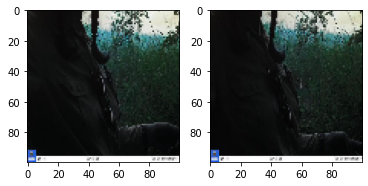

In [13]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(data[0][0])
axarr[1].imshow(data[5][0])

In [6]:
first_img = np.sum(data[7][0])
second_img = np.sum(data[6][0])
print(first_img)
print(second_img)
print(second_img-first_img)

3453583
4004732
551149


In [10]:
difference_list = []
for index, i in enumerate(data[:-1]):
    first_img = np.sum(i[0])
    second_img = np.sum(data[index+1][0])

    if first_img > second_img:
        total = first_img - second_img
    else:
        total = second_img - first_img
    
    difference_list.append(total)

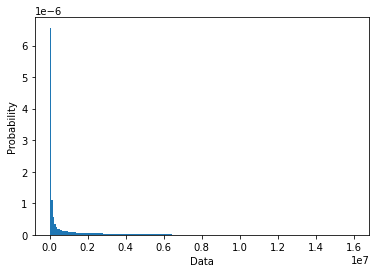

In [11]:
plt.hist(difference_list, density=True, bins=200)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

In [77]:
# threshold = max(difference_list) // 2000
# threshold 

In [78]:
# plt.ion()
# for index, i in enumerate(difference_list[:-1]):
#     if i < threshold:
# #         plt.imshow(data[2][0])
# #         plt.show()
#         f, axarr = plt.subplots(1,2)
#         axarr[0].imshow(data[index][0], cmap="gray")
#         axarr[1].imshow(data[index+1][0], cmap="gray")
#         plt.show()
    

# remove over and under exposed images

In [23]:
images_plot = []
for i in tqdm(data):
    first_img = np.sum(i[0]) / (100 * 100 * 3) 
    images_plot.append(first_img)

100%|██████████| 243628/243628 [02:18<00:00, 1764.24it/s]


In [78]:
pictures = []
for i in tqdm(data):
    pictures.append(i[2])

100%|██████████| 243628/243628 [00:00<00:00, 1242319.34it/s]


Text(0.5, 1.0, 'Over and under saturated images')

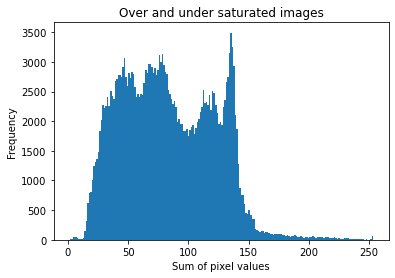

In [24]:
plt.hist(images_plot, bins=200)  # density=False would make counts
plt.ylabel('Frequency')
plt.xlabel('Sum of pixel values')
plt.title("Over and under saturated images")
# plt.savefig("outliers.png")

In [38]:
overexposed = []
plt.ion()
for idx, pixel in enumerate(images_plot):
    if pixel > 160:
        overexposed.append(data[idx][2])
#         plt.imshow(data[idx][0])
#         plt.show()

In [39]:
df=pd.DataFrame({"overexposed":overexposed})

In [40]:
df

,overexposed
0,1639839.jpg
1,0674370.jpg
2,0979153.jpg
3,0053173.jpg
4,0437674.jpg
...,...
3718,0511815.jpg
3719,0349001.jpg
3720,0698857.jpg
3721,0409807.jpg


In [41]:
df.to_csv("C:/Users/Siebren/Data_science/Data/Data_Gabon/overexposed.csv", index=None)

# MEAN AVERAGE ERROR

In [42]:
saved_img = data[0][0]
err_list = []

for index, i in enumerate(tqdm(data)):
    err = np.sum((i[0] - saved_img) ** 2)
    err /= float(i[0].shape[0] * saved_img.shape[1])
    err_list.append(err)           
    saved_img = data[index][0]

100%|██████████| 243628/243628 [06:04<00:00, 668.83it/s]


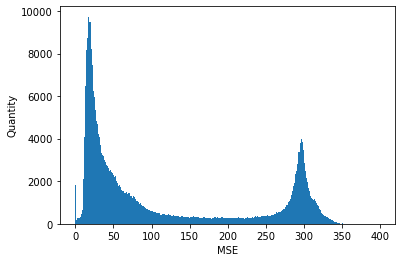

In [40]:
plt.hist(err_list, density=False, bins=300)  # density=False would make counts
plt.ylabel('Quantity')
plt.xlabel('MSE')
plt.savefig("MEA.png")

In [ ]:
new_data = [data[0][2]]
for index, i in enumerate(err_list):
    if i > 250:
        new_data.append(data[index][2])

In [33]:
len(new_data)

110287

In [34]:
# count = 0
# for err in err_list:
#     if err == 0:
#         count+=1
        
# print(count)

In [35]:
new_dict = {'name': new_data}   
df = pd.DataFrame(new_dict) 

In [36]:
df

,name
0,0000005.jpg
1,0000021.jpg
2,0000025.jpg
3,0000029.jpg
4,0000032.jpg
...,...
110282,K0758088.JPG
110283,F2451519.JPG
110284,J2559677.JPG
110285,I2831434.JPG


In [37]:
df.to_csv("C:/Users/Siebren/Data_science/Data/Data_Gabon/data_without_series_200.csv", index=None)

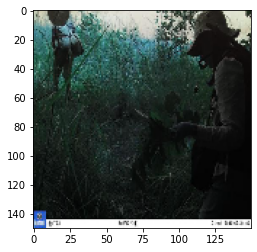

In [49]:
plt.imshow(data[16][0])
plt.show()

In [51]:
labels = pd.read_csv("C:/Users/Siebren/Data_science/Data/Data_Gabon/data_training_extra_Labels_train_valid_df_200722.csv")

# find empty images

In [19]:
# overbelichtheid
((224 * 224 * 3 * 255) /100) * 90

34546176.0

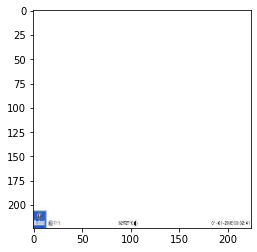

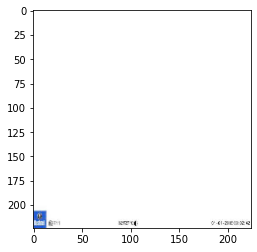

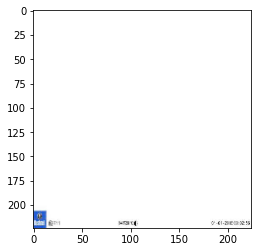

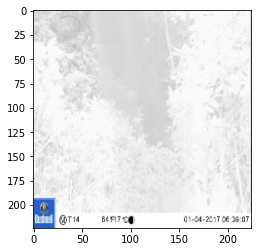

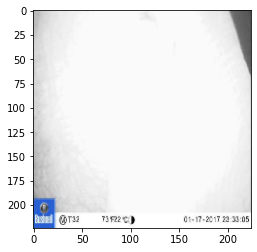

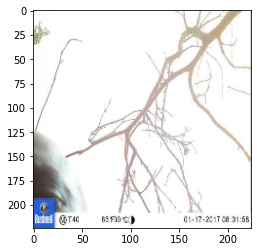

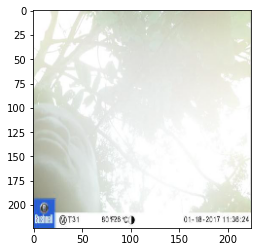

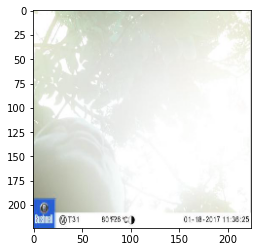

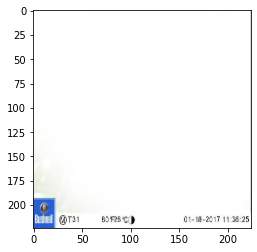

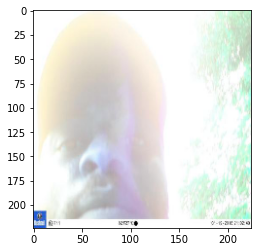

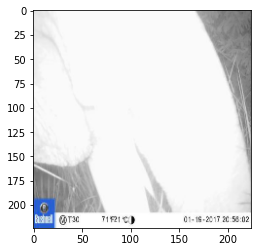

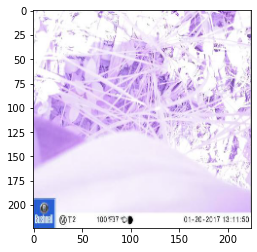

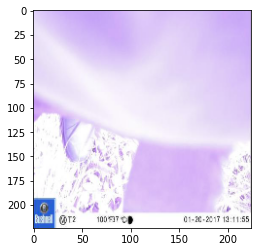

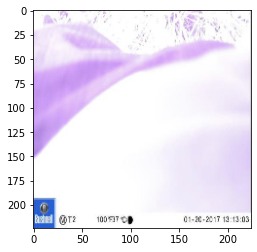

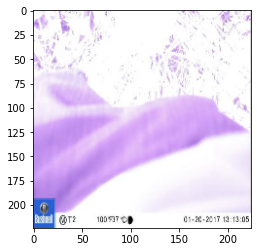

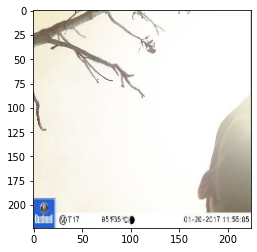

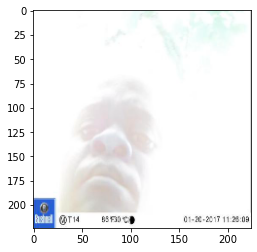

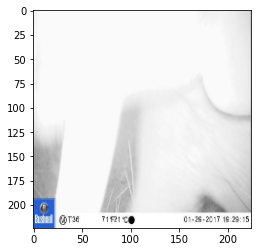

18


In [260]:
empty = []
plt.ion()
counter = 0
for i in data:
    first_img = np.sum(i[0])
    if first_img > 34546176:
        plt.imshow(i[0])
        plt.show()
        counter+=1
print(counter)